In [1]:
import requests  
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)  
  
# Writing data to file to avoid path isuues
with open("ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

In [2]:
from IPython.display import HTML, clear_output
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

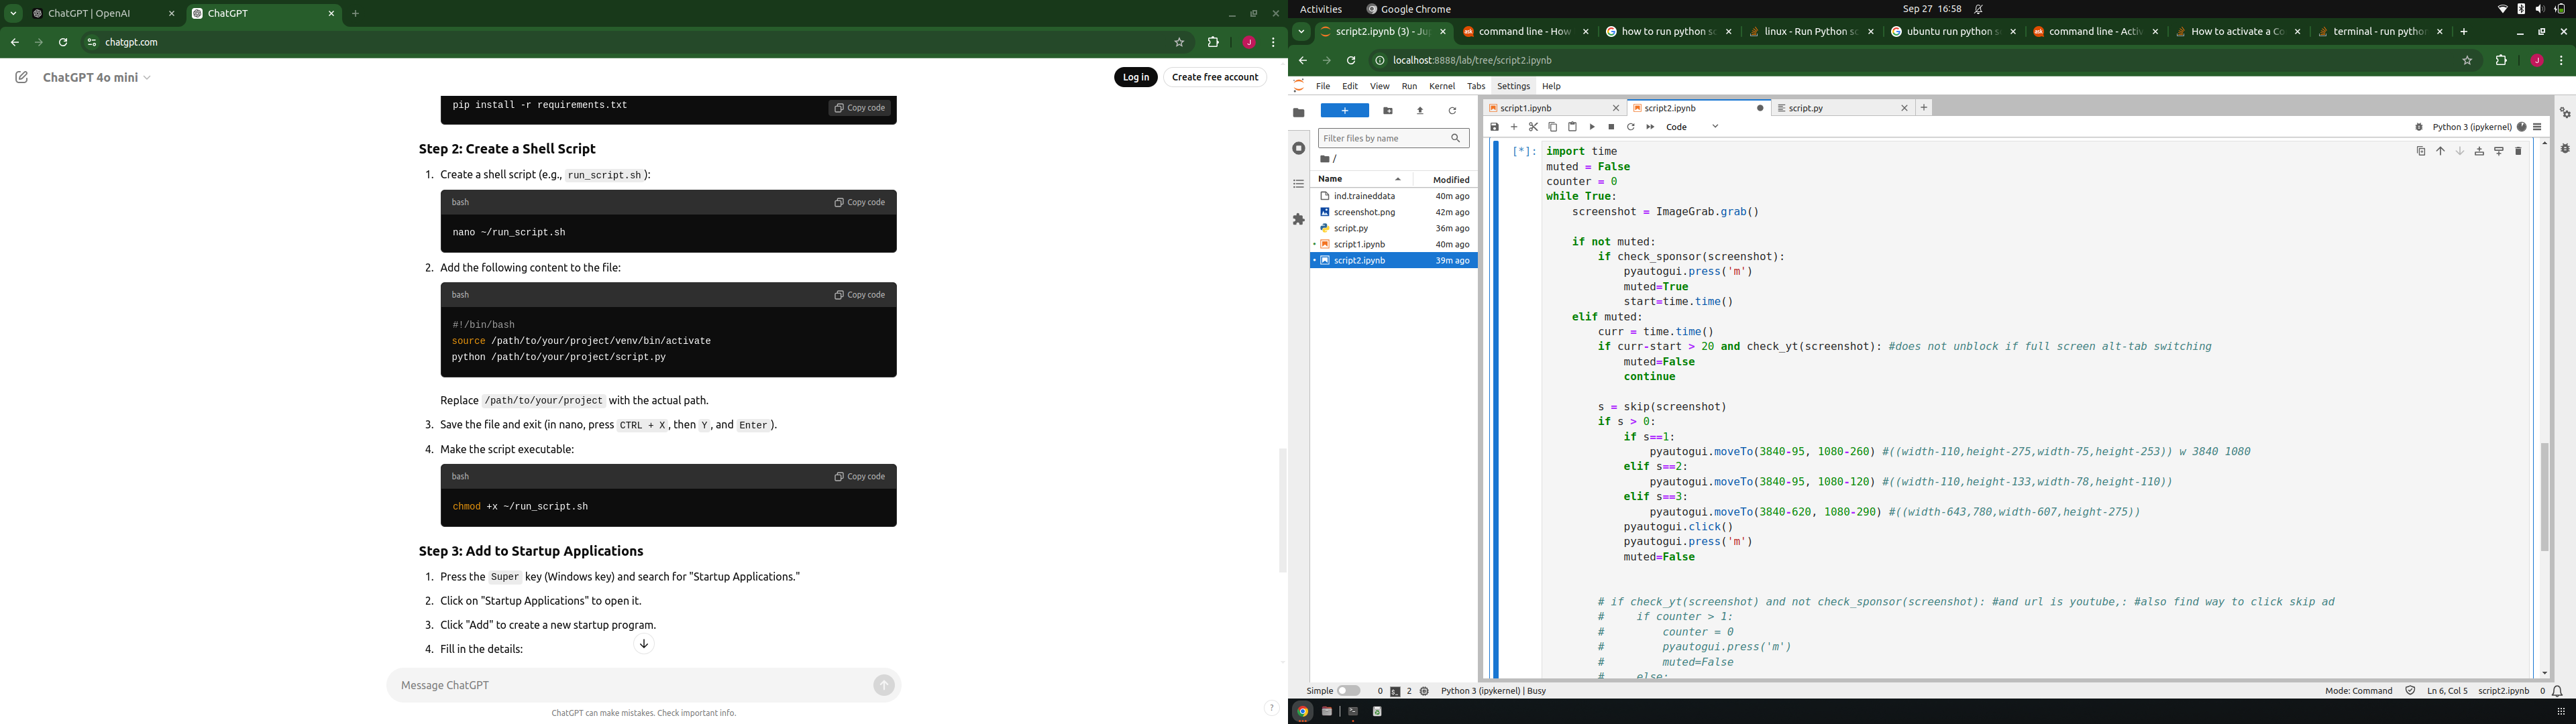

In [3]:
from PIL import ImageGrab
screenshot = ImageGrab.grab()
#screenshot.save("screenshot.png")
screenshot

In [4]:
def check_yt(img):
    width,height = img.size
    url = img.crop((width//2+155,75,width-1682,100))
    urlText = pytesseract.image_to_string(url)
    return urlText.split('\n')[0] == 'youtube.com'

In [5]:
def check_sponsor(img): #optimize by reducing 3 predictions to fewer
    width,height = img.size
    sponsorTheater = img.crop((width//2+18,840,width-1760,height-222)) #height))
    sponsorTheaterText = pytesseract.image_to_string(sponsorTheater)
    for word in sponsorTheaterText.split(' '):
        if word == 'Sponsored':
            return True
    sponsorFullScreen = img.crop((width//2+40,980,width-1730,height-80)) #height))
    sponsorFullScreenText = pytesseract.image_to_string(sponsorFullScreen)
    for word in sponsorFullScreenText.split(' '):
        if word == 'Sponsored':
            return True
    sponsor = img.crop((width//2+125,817,width-1640,height-245)) #height))
    sponsorText = pytesseract.image_to_string(sponsor)
    for word in sponsorText.split(' '):
        if word == 'Sponsored':
            return True
    return False

In [6]:
import pyautogui
if check_sponsor(screenshot):
    pyautogui.press('m')

In [7]:
'''
run as system audio to be able to resume it off tab?
skip function not consistent
muting not consistent
run as script
'''

'\nrun as system audio to be able to resume it off tab?\nskip function not consistent\nmuting not consistent\nrun as script\n'

In [8]:
#%timeit for i in range(60): pic = ImageGrab.grab()

In [9]:
#%timeit check_sponsor(screenshot) #.1s per prediction, .3 per function call

In [10]:
def skip(img):
    width,height = img.size
    skipTheater = img.crop((width-110,height-275,width-75,height-253))
    skipTheaterText = pytesseract.image_to_string(skipTheater)
    if skipTheaterText.split('\n')[0] == 'Skip':
        return 1
    skipFullScreen = img.crop((width-110,height-133,width-78,height-110))
    skipFullScreenText = pytesseract.image_to_string(skipFullScreen)
    if skipFullScreenText.split('\n')[0] == 'Skip':
        return 2
    skip = img.crop((width-643,780,width-607,height-275))
    skipText = pytesseract.image_to_string(skip) #terrible calibration if not theater
    if skipText.split('\n')[0] == 'Skip':
        return 3
    return 0

In [11]:
import time
muted = False
counter = 0
while True:
    screenshot = ImageGrab.grab()
    
    if not muted:
        if check_sponsor(screenshot):
            pyautogui.press('m')
            muted=True
            start=time.time()
    elif muted:
        curr = time.time()
        if curr-start > 30 and check_yt(screenshot): #does not unblock if full screen alt-tab switching
            muted=False
            continue
        
        s = skip(screenshot)
        if s > 0:
            if s==1:
                pyautogui.moveTo(3840-95, 1080-260) #((width-110,height-275,width-75,height-253)) w 3840 1080
            elif s==2:
                pyautogui.moveTo(3840-95, 1080-120) #((width-110,height-133,width-78,height-110))
            elif s==3:
                pyautogui.moveTo(3840-620, 1080-290) #((width-643,780,width-607,height-275))
            pyautogui.click()
            pyautogui.press('m')
            muted=False


KeyboardInterrupt: 